**TensorFlow 2 Object Detection API with Google Colab**


### Настрофка среды

In [1]:
# Подключаемся к диску

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# Загружаем необходимый репозиторий в папку для обучения


%cd '/content/gdrive/My Drive/TensorFlow'

!git clone https://github.com/tensorflow/models.git

/content/gdrive/My Drive/TensorFlow
Cloning into 'models'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 51616 (delta 38), reused 58 (delta 18), pack-reused 51525
Receiving objects: 100% (51616/51616), 568.93 MiB | 15.00 MiB/s, done.
Resolving deltas: 100% (35214/35214), done.
Checking out files: 100% (2243/2243), done.


In [2]:
# Устанавливаем необходимые библиотеки

!apt-get install protobuf-compiler python-lxml python-pil
!pip install Cython pandas tf-slim lvis

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 17 not upgraded.
Need to get 1,615 kB of archives.
After this operation, 8,907 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:3 http:/

In [3]:
# Компилируем Protobuf

%cd '/content/gdrive/My Drive/TensorFlow/models/research/'
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/My Drive/TensorFlow/models/research


In [4]:
# Настраиваем среду окружения Python

import os
import sys
os.environ['PYTHONPATH']+=":/content/gdrive/My Drive/TensorFlow/models"
sys.path.append("/content/gdrive/My Drive/TensorFlow/models/research")

In [5]:
!cp object_detection/packages/tf2/setup.py .

In [6]:
# Устанавливаем setup.py.

!python setup.py build
!python setup.py install

running build
running build_py
copying object_detection/protos/anchor_generator_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/argmax_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/bipartite_matcher_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_predictor_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/calibration_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/eval_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/center_net_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/faster_rcnn_box_coder_pb2.py -> build/lib/object_detection/protos
copying object_detection/protos/flexible_grid_anchor_generator_pb2.py -> 

In [7]:
# Тестирование правильности установки

%cd '/content/gdrive/My Drive/TensorFlow/models/research/object_detection/builders/'
!python model_builder_tf2_test.py
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
print('Done')

/content/gdrive/My Drive/TensorFlow/models/research/object_detection/builders
2021-02-12 07:20:26.523798: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
2021-02-12 07:20:40.795096: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-12 07:20:40.796084: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-12 07:20:40.856334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-12 07:20:40.856963: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16G

### Подготовка разметки

In [8]:
# Вычисляем TFrecords.

#cd into preprocessing directory
%cd '/content/gdrive/My Drive/TensorFlow/scripts/preprocessing'

# формируем train.record
!python generate_tfrecord.py -x '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/train' -l '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/train.record'

# !python generate_tfrecord.py -x '[path_to_train_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/train.record'
# !python generate_tfrecord.py -x '[path_to_test_folder]' -l '[path_to_annotations_folder]/label_map.pbtxt' -o '[path_to_annotations_folder]/test.record'


/content/gdrive/My Drive/TensorFlow/scripts/preprocessing
Successfully created the TFRecord file: /content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/train.record


In [10]:
# формируем test.record
%cd '/content/gdrive/My Drive/TensorFlow/scripts/preprocessing'

!python generate_tfrecord.py -x '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test' -l '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt' -o '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/test.record'

/content/gdrive/My Drive/TensorFlow/scripts/preprocessing
Successfully created the TFRecord file: /content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/test.record


Копируем некоторые файлы


*   Копируем "model_main_tf2.py" из   "TensorFlow\models\research\object_detection" и помещаем его в training_demo. Нужно для выполнения обучения.

*   Копируем "exporter_main_v2.py" из "TensorFlow\models\research\object_detection" и помещаем его в training_demo.
Нужно для выполнения обучения.






In [9]:
%cd '/content/gdrive/My Drive/TensorFlow/workspace/training_demo'

/content/gdrive/My Drive/TensorFlow/workspace/training_demo


### Тренируем нейросеть

In [10]:
# Тренируем сеть

#run the cell to start model training 
#!python model_main_tf2.py --model_dir=models/ssd_mobilenet_v1_fpn --pipeline_config_path=models/ssd_mobilenet_v1_fpn/pipeline.config
#!python model_main_tf2.py --model_dir=models/centernet_hg104 --pipeline_config_path=models/centernet_hg104/pipeline.config
#!python model_main_tf2.py --model_dir=models/ssd_resnet50_v1_fpn --pipeline_config_path=models/ssd_resnet50_v1_fpn/pipeline.config
#!python model_main_tf2.py --model_dir=models/efficientdet_d3_coco17_tpu --pipeline_config_path=models/efficientdet_d3_coco17_tpu/pipeline.config
!python model_main_tf2.py --model_dir=models/ssd_mobilenet_v2_fpnlite --pipeline_config_path=models/ssd_mobilenet_v2_fpnlite/pipeline.config

# !python model_main_tf2.py --model_dir=models/[name_of_pre-trained-model_you_downloaded] --pipeline_config_path=models/[name_of_pre-trained-model_you_downloaded]/pipeline.config

2021-02-12 07:41:20.214196: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-12 07:41:23.343260: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-12 07:41:23.344075: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-12 07:41:23.358566: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-12 07:41:23.359171: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-02-12 07:41:23.359202: I tensorflow/stream_executor/platform/def

Закончили упражнение!



In [11]:
# Экспорт модели

!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./models/ssd_mobilenet_v2_fpnlite/pipeline.config --trained_checkpoint_dir ./models/ssd_mobilenet_v2_fpnlite/ --output_directory ./exported-models/my_model_ssd_mobilenet_v2_fpnlite


# !python exporter_main_v2.py --input_type image_tensor --pipeline_config_path ./models/[name_of_pre-trained-model you downloaded]/pipeline.config --trained_checkpoint_dir ./models/[name_of_pre-trained-model_you_downloaded]/ --output_directory ./exported-models/my_model

2021-02-12 09:22:38.644554: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-02-12 09:22:41.846650: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-02-12 09:22:41.849177: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-02-12 09:22:41.870231: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-02-12 09:22:41.870784: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2021-02-12 09:22:41.870811: I tensorflow/stream_executor/platform/def

### Тестируем модель

In [12]:
# Загружаем модель

import tensorflow as tf
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL="/content/gdrive/My Drive/TensorFlow/workspace/training_demo/exported-models/my_model_ssd_mobilenet_v2_fpnlite/saved_model"

print('Loading model...', end='')

detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)

print('Done!')

Loading model...Done!


In [13]:
# Загружаем label_map
category_index=label_map_util.create_category_index_from_labelmap("/content/gdrive/My Drive/TensorFlow/workspace/training_demo/annotations/label_map.pbtxt",use_display_name=True)
# Тестовые картинки

img=['file503.png','file504.png','file529.png','file550.png','file575.png','file586.png']
print(img)


In [15]:
%cd '/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test/'

/content/gdrive/My Drive/TensorFlow/workspace/training_demo/images/test


Running inference for file503.png... Done


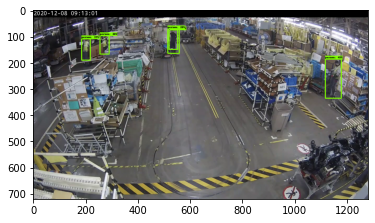

Running inference for file504.png... Done


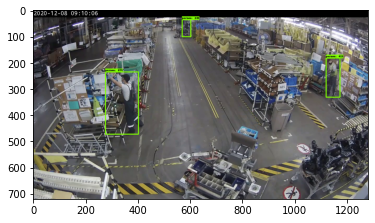

Running inference for file529.png... Done


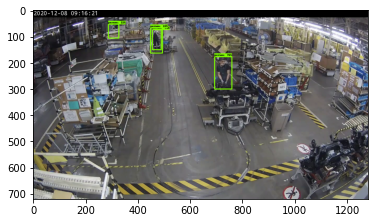

Running inference for file550.png... Done


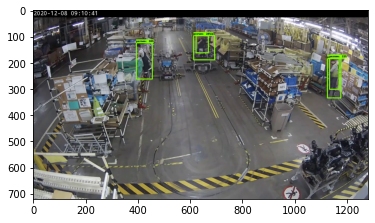

Running inference for file575.png... Done


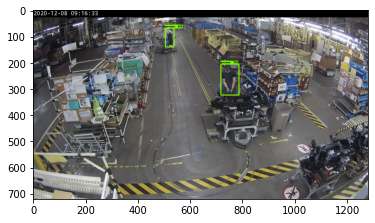

Running inference for file586.png... Done


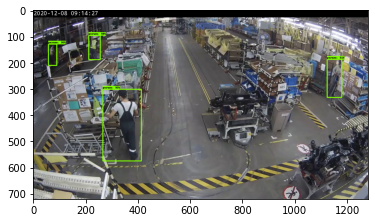

In [17]:
# Инференс

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

for image_path in img:

    print('Running inference for {}... '.format(image_path), end='')
    image_np=load_image_into_numpy_array(image_path)


    input_tensor=tf.convert_to_tensor(image_np)
    input_tensor=input_tensor[tf.newaxis, ...]

    detections=detect_fn(input_tensor)

    num_detections=int(detections.pop('num_detections'))
    detections={key:value[0,:num_detections].numpy()
                   for key,value in detections.items()}
    detections['num_detections']=num_detections

    detections['detection_classes']=detections['detection_classes'].astype(np.int64)

    image_np_with_detections=image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=5,    
          min_score_thresh=.2,     
          agnostic_mode=False)
    %matplotlib inline
    plt.figure()
    plt.imshow(image_np_with_detections)
    print('Done')
    plt.show()